# Data Science Bootcamp
# <center> **Aula 14b -- Multidimensional Scaling**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Multidimensional scaling

In [24]:
dist = pd.read_csv('eurodist.txt', sep=' ', header=0)
dist.shape

(21, 21)

In [11]:
dist

,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,Hamburg,...,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Stockholm,Vienna
Athens,0,3313,2963,3175,3339,2762,3276,2610,4485,2977,...,4532,2753,3949,2865,2282,2179,3000,817,3927,1991
Barcelona,3313,0,1318,1326,1294,1498,2218,803,1172,2018,...,1305,645,636,521,1014,1365,1033,1460,2868,1802
Brussels,2963,1318,0,204,583,206,966,677,2256,597,...,2084,690,1558,1011,925,747,285,1511,1616,1175
Calais,3175,1326,204,0,460,409,1136,747,2224,714,...,2052,739,1550,1059,1077,977,280,1662,1786,1381
Cherbourg,3339,1294,583,460,0,785,1545,853,2047,1115,...,1827,789,1347,1101,1209,1160,340,1794,2196,1588
Cologne,2762,1498,206,409,785,0,760,1662,2436,460,...,2290,714,1764,1035,911,583,465,1497,1403,937
Copenhagen,3276,2218,966,1136,1545,760,0,1418,3196,460,...,2971,1458,2498,1778,1537,1104,1176,2050,650,1455
Geneva,2610,803,677,747,853,1662,1418,0,1975,1118,...,1936,158,1439,425,328,591,513,995,2068,1019
Gibraltar,4485,1172,2256,2224,2047,2436,3196,1975,0,2897,...,676,1817,698,1693,2185,2565,1971,2631,3886,2974
Hamburg,2977,2018,597,714,1115,460,460,1118,2897,0,...,2671,1159,2198,1479,1238,805,877,1751,949,1155


In [12]:
D = dist.values.astype(np.float32)
D.shape

(21, 21)

In [13]:
n = D.shape[0]

one = np.ones(n).reshape(-1,1)
J = np.eye(n) - one@one.T / n     # projection matrix

In [14]:
X = -(J@(D**2)@J) / 2.        # md scaling (creates coordinates from distances)

In [15]:
U, S, V = np.linalg.svd(X)

In [16]:
X2 = X@V[:2,:].T / 1e6        # proyection onto 2D plane
X2.shape

(21, 2)

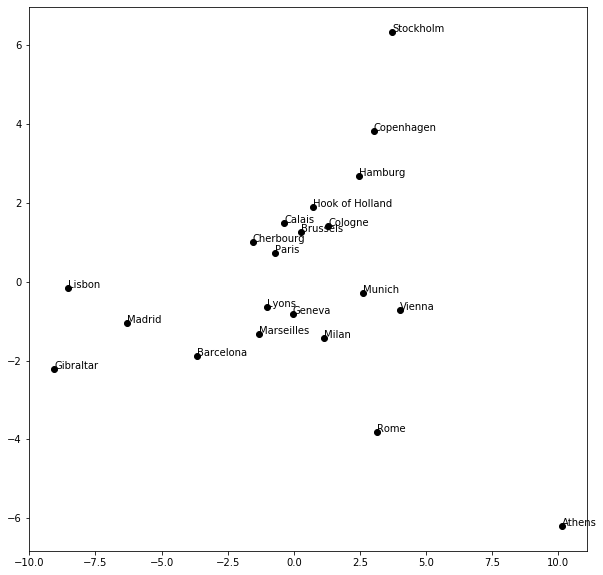

In [17]:
fig = plt.figure(figsize=(10,10))
plt.plot(-X2[:,0], X2[:,1], 'ko')
for i in range(0, n):
    plt.annotate(list(dist.columns)[i], xy=[-X2[i,0], X2[i,1]])
plt.show()

In [18]:
#fig.savefig('euromap.pdf', bbox_inches='tight')